## Bike Rental Assignment

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#import stats module
import statsmodels
import statsmodels.api as sm

import sklearn as sk
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Read the csv file provided

In [2]:
rental_df = pd.read_csv(r"C:\Users\nares\Desktop\PG Diploma\Regression\MIL\Assignment\day.csv")
rental_df.shape

(730, 16)

In [3]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Remove columns which donot add value to the prediction
- instant --- row number;
- dteday --- date but this column is interpreted by yr and month;
- temp and atemp --- is the temperature per day;
- casual and registered column --- is just grouping of the customers based on their subscription (which is not necessary in the prediction)

In [4]:
cols_rem = ['instant','dteday','atemp','casual','registered']
rental_df = rental_df.drop(cols_rem,axis=1)
rental_df.shape

(730, 11)

In [5]:
### Modify the columns datatypes
#cols_tocategory = ['season','mnth','weekday','weathersit']
#rental_df[cols_tocategory] = rental_df[cols_tocategory].astype('category')

In [6]:
rental_df1= rental_df.replace({'weekday' :{0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},
                   'weathersit' : { 1:'clear',2:'Mist',3:'Light Shower',4:'Heavy Shower'},
                   'season' : { 1:'Spring',2:'Summer',3:'fall',4:'Winter'},
                   'mnth' : { 1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}})

In [7]:
rental_df1.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,1600
5,Spring,0,Jan,0,Thursday,1,clear,8.378268,51.8261,6.000868,1606
6,Spring,0,Jan,0,Friday,1,Mist,8.057402,49.8696,11.304642,1510
7,Spring,0,Jan,0,Saturday,0,Mist,6.765000,53.5833,17.875868,959
8,Spring,0,Jan,0,Sunday,0,clear,5.671653,43.4167,24.250650,822
9,Spring,0,Jan,0,Monday,1,clear,6.184153,48.2917,14.958889,1321


In [8]:
rental_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


### Functions to plot the graphs

In [9]:
def multipleboxplots(yAxis,xAxes,df):
    count=1
    plt.figure(figsize=(25,15))
    for xAxis in xAxes:
        plt.subplot(3,3,count)
        title ="Box Plot On Count Across "+ xAxis
        labely='Count of Rentals'
        labelx = xAxis
        sns.boxplot(y=yAxis,x=xAxis,data=df).set(title=title, xlabel=labelx, ylabel=labely)
        count =count+1
    plt.show()

In [10]:
def multiplebarplots(yAxis,xAxes,df):
    count=1
    plt.figure(figsize=(25,15))
    for xAxis in xAxes:
        plt.subplot(4,3,count)
        title ="Box Plot On Count Across "+ xAxis
        labely='Count of Rentals'
        labelx = xAxis
        sns.barplot(y=yAxis,x=xAxis,data=df).set(title=title, xlabel=labelx, ylabel=labely)
        count =count+1
    plt.show()

In [11]:
def multipleplots(xAxes,df):
    count=1
    plt.figure(figsize=(25,15))
    for xAxis in xAxes:
        plt.subplot(4,3,count)
        sns.factorplot(data=df, x=xAxis, kind= 'count')
        count =count+1
    plt.show()

In [12]:
def multiplescatterplot(yAxis,xAxes,df):
    count=1
    plt.figure(figsize=(35,20))
    for xAxis in xAxes:
        plt.subplot(4,3,count)
        title ="Box Plot On Count Across "+ xAxis
        labely='Count of Rentals'
        labelx = xAxis
        sns.regplot(y=yAxis,x=xAxis,data=df).set(title=title, xlabel=labelx, ylabel=labely)
        count =count+1
    plt.show()

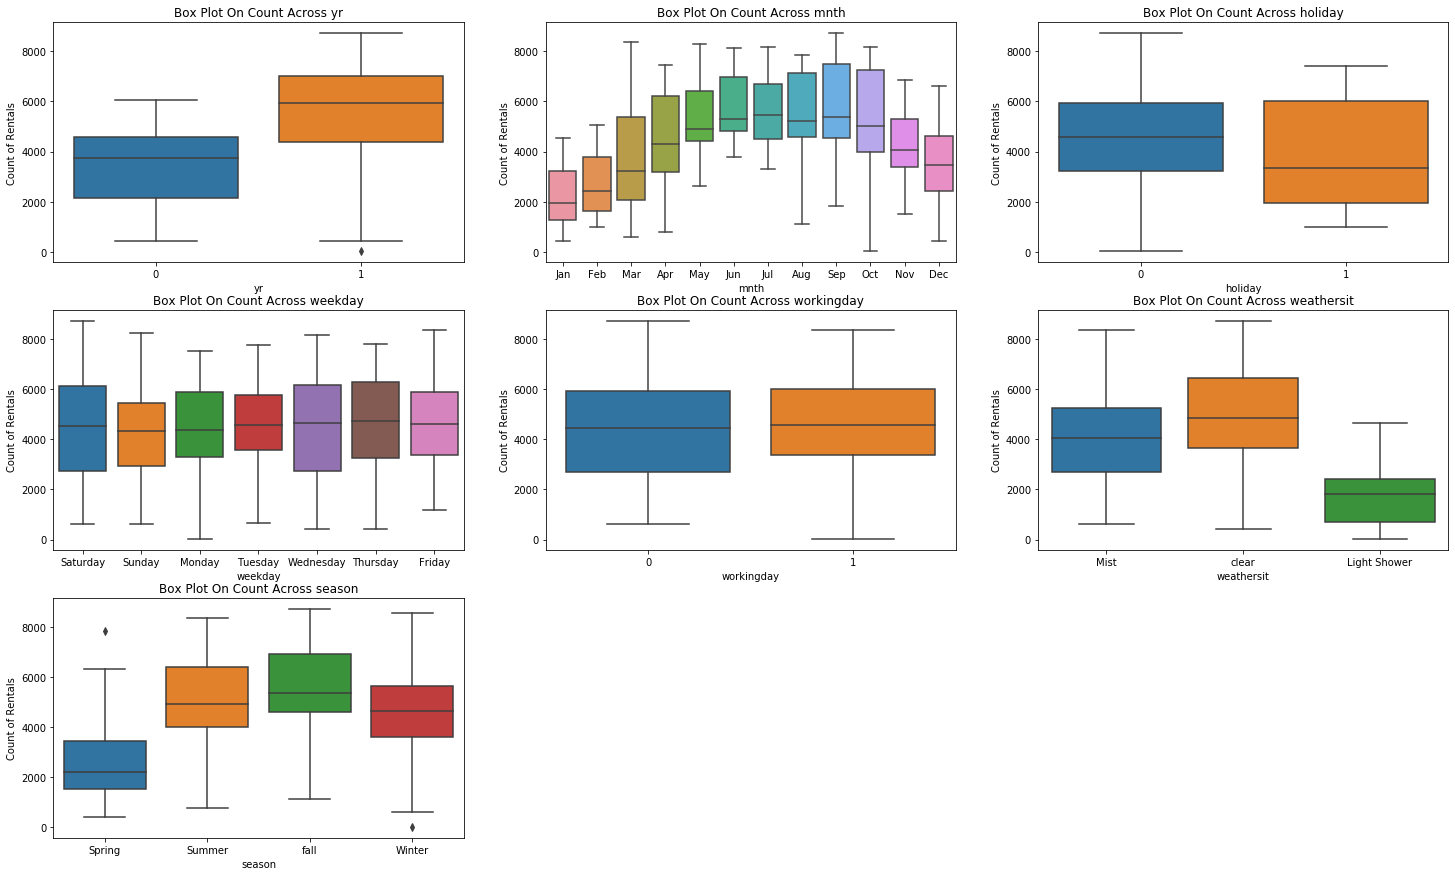

In [13]:
cols_toplot = ['yr','mnth','holiday','weekday','workingday','weathersit','season']
multipleboxplots('cnt',cols_toplot,rental_df1)

In [14]:
#cols_toplot =['yr','mnth','holiday','weekday','workingday','weathersit','season','windspeed','temp','hum']
#multiplebarplots('cnt',cols_toplot,rental_df1)

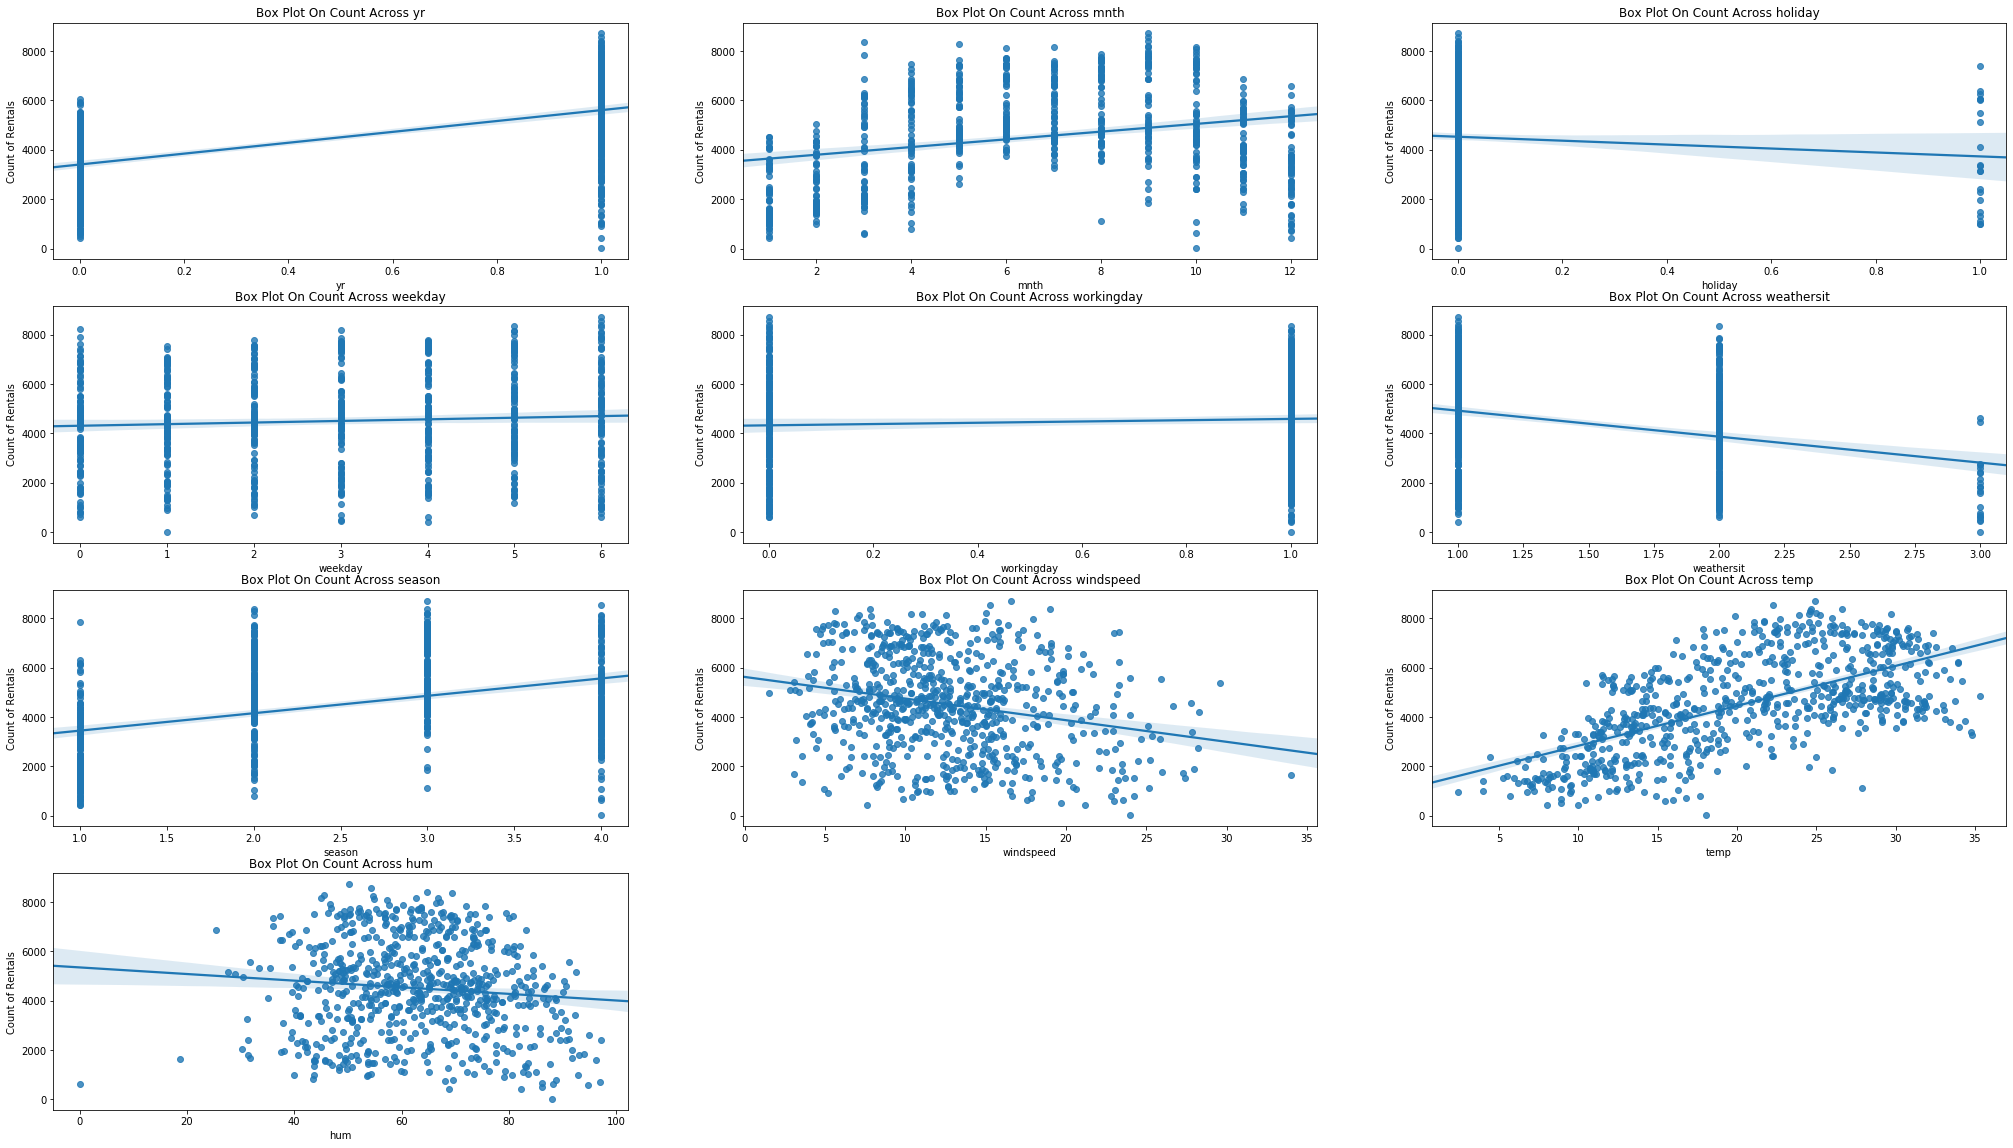

In [15]:
cols_toplot =['yr','mnth','holiday','weekday','workingday','weathersit','season','windspeed','temp','hum']
multiplescatterplot('cnt',cols_toplot,rental_df)

### Check for missing values

In [16]:
rental_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64

### Check for any outliers

In [17]:
rental_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


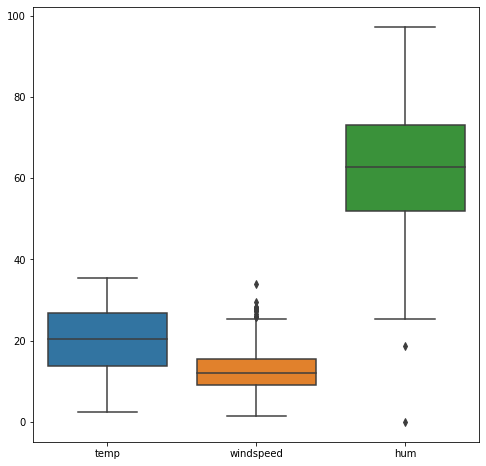

In [18]:
sns.boxplot(data=rental_df[['temp','windspeed','hum']])
fig=plt.gcf()
fig.set_size_inches(8,8)

In [19]:
#Remove outliers in Humidity
q75, q25 = np.percentile(rental_df['hum'], [75 ,25])
print(q75,q25)
iqr = q75 - q25
print(iqr)
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

rental_df = rental_df[~(rental_df['hum']<min)]

72.989575 52.0
20.989575000000002
20.515637499999997
104.4739375


In [20]:
#Remove outliers in Windspeed
q75, q25 = np.percentile(rental_df['windspeed'], [75 ,25])
print(q75,q25)
iqr = q75 - q25
print(iqr)
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)

rental_df = rental_df[~(rental_df['windspeed']>max)]

15.624735 9.031466
6.593268999999999
-0.8584374999999991
25.514638499999997


In [21]:
rental_df.shape

(716, 11)

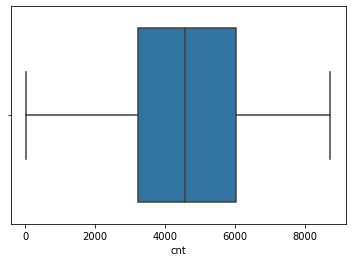

In [22]:
sns.boxplot( x=rental_df["cnt"])
plt.show()

In [23]:
rental_df.shape

(716, 11)

mnth
1     61
2     52
3     58
4     58
5     62
6     60
7     62
8     62
9     60
10    60
11    60
12    61
dtype: int64


Text(0, 0.5, 'Total Bikes Rented')

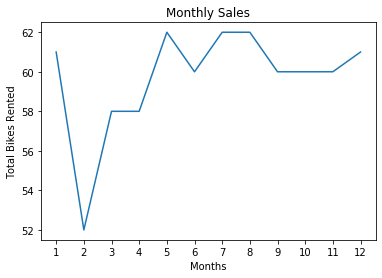

In [24]:
#Bike Rentals Monthly
sales_by_month = rental_df.groupby('mnth').size()
print(sales_by_month)
#Plotting the Graph
plot_by_month = sales_by_month.plot(title='Monthly Sales',xticks=(1,2,3,4,5,6,7,8,9,10,11,12))
plot_by_month.set_xlabel('Months')
plot_by_month.set_ylabel('Total Bikes Rented')

season
1    171
2    181
3    188
4    176
dtype: int64


Text(0, 0.5, 'Total Bikes Rented')

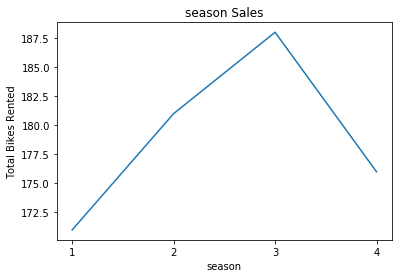

In [25]:
#Bike Rentals Monthly
sales_by_season = rental_df.groupby('season').size()
print(sales_by_season)
#Plotting the Graph
plot_by_month = sales_by_season.plot(title='season Sales',xticks=(1,2,3,4))
plot_by_month.set_xlabel('season')
plot_by_month.set_ylabel('Total Bikes Rented')

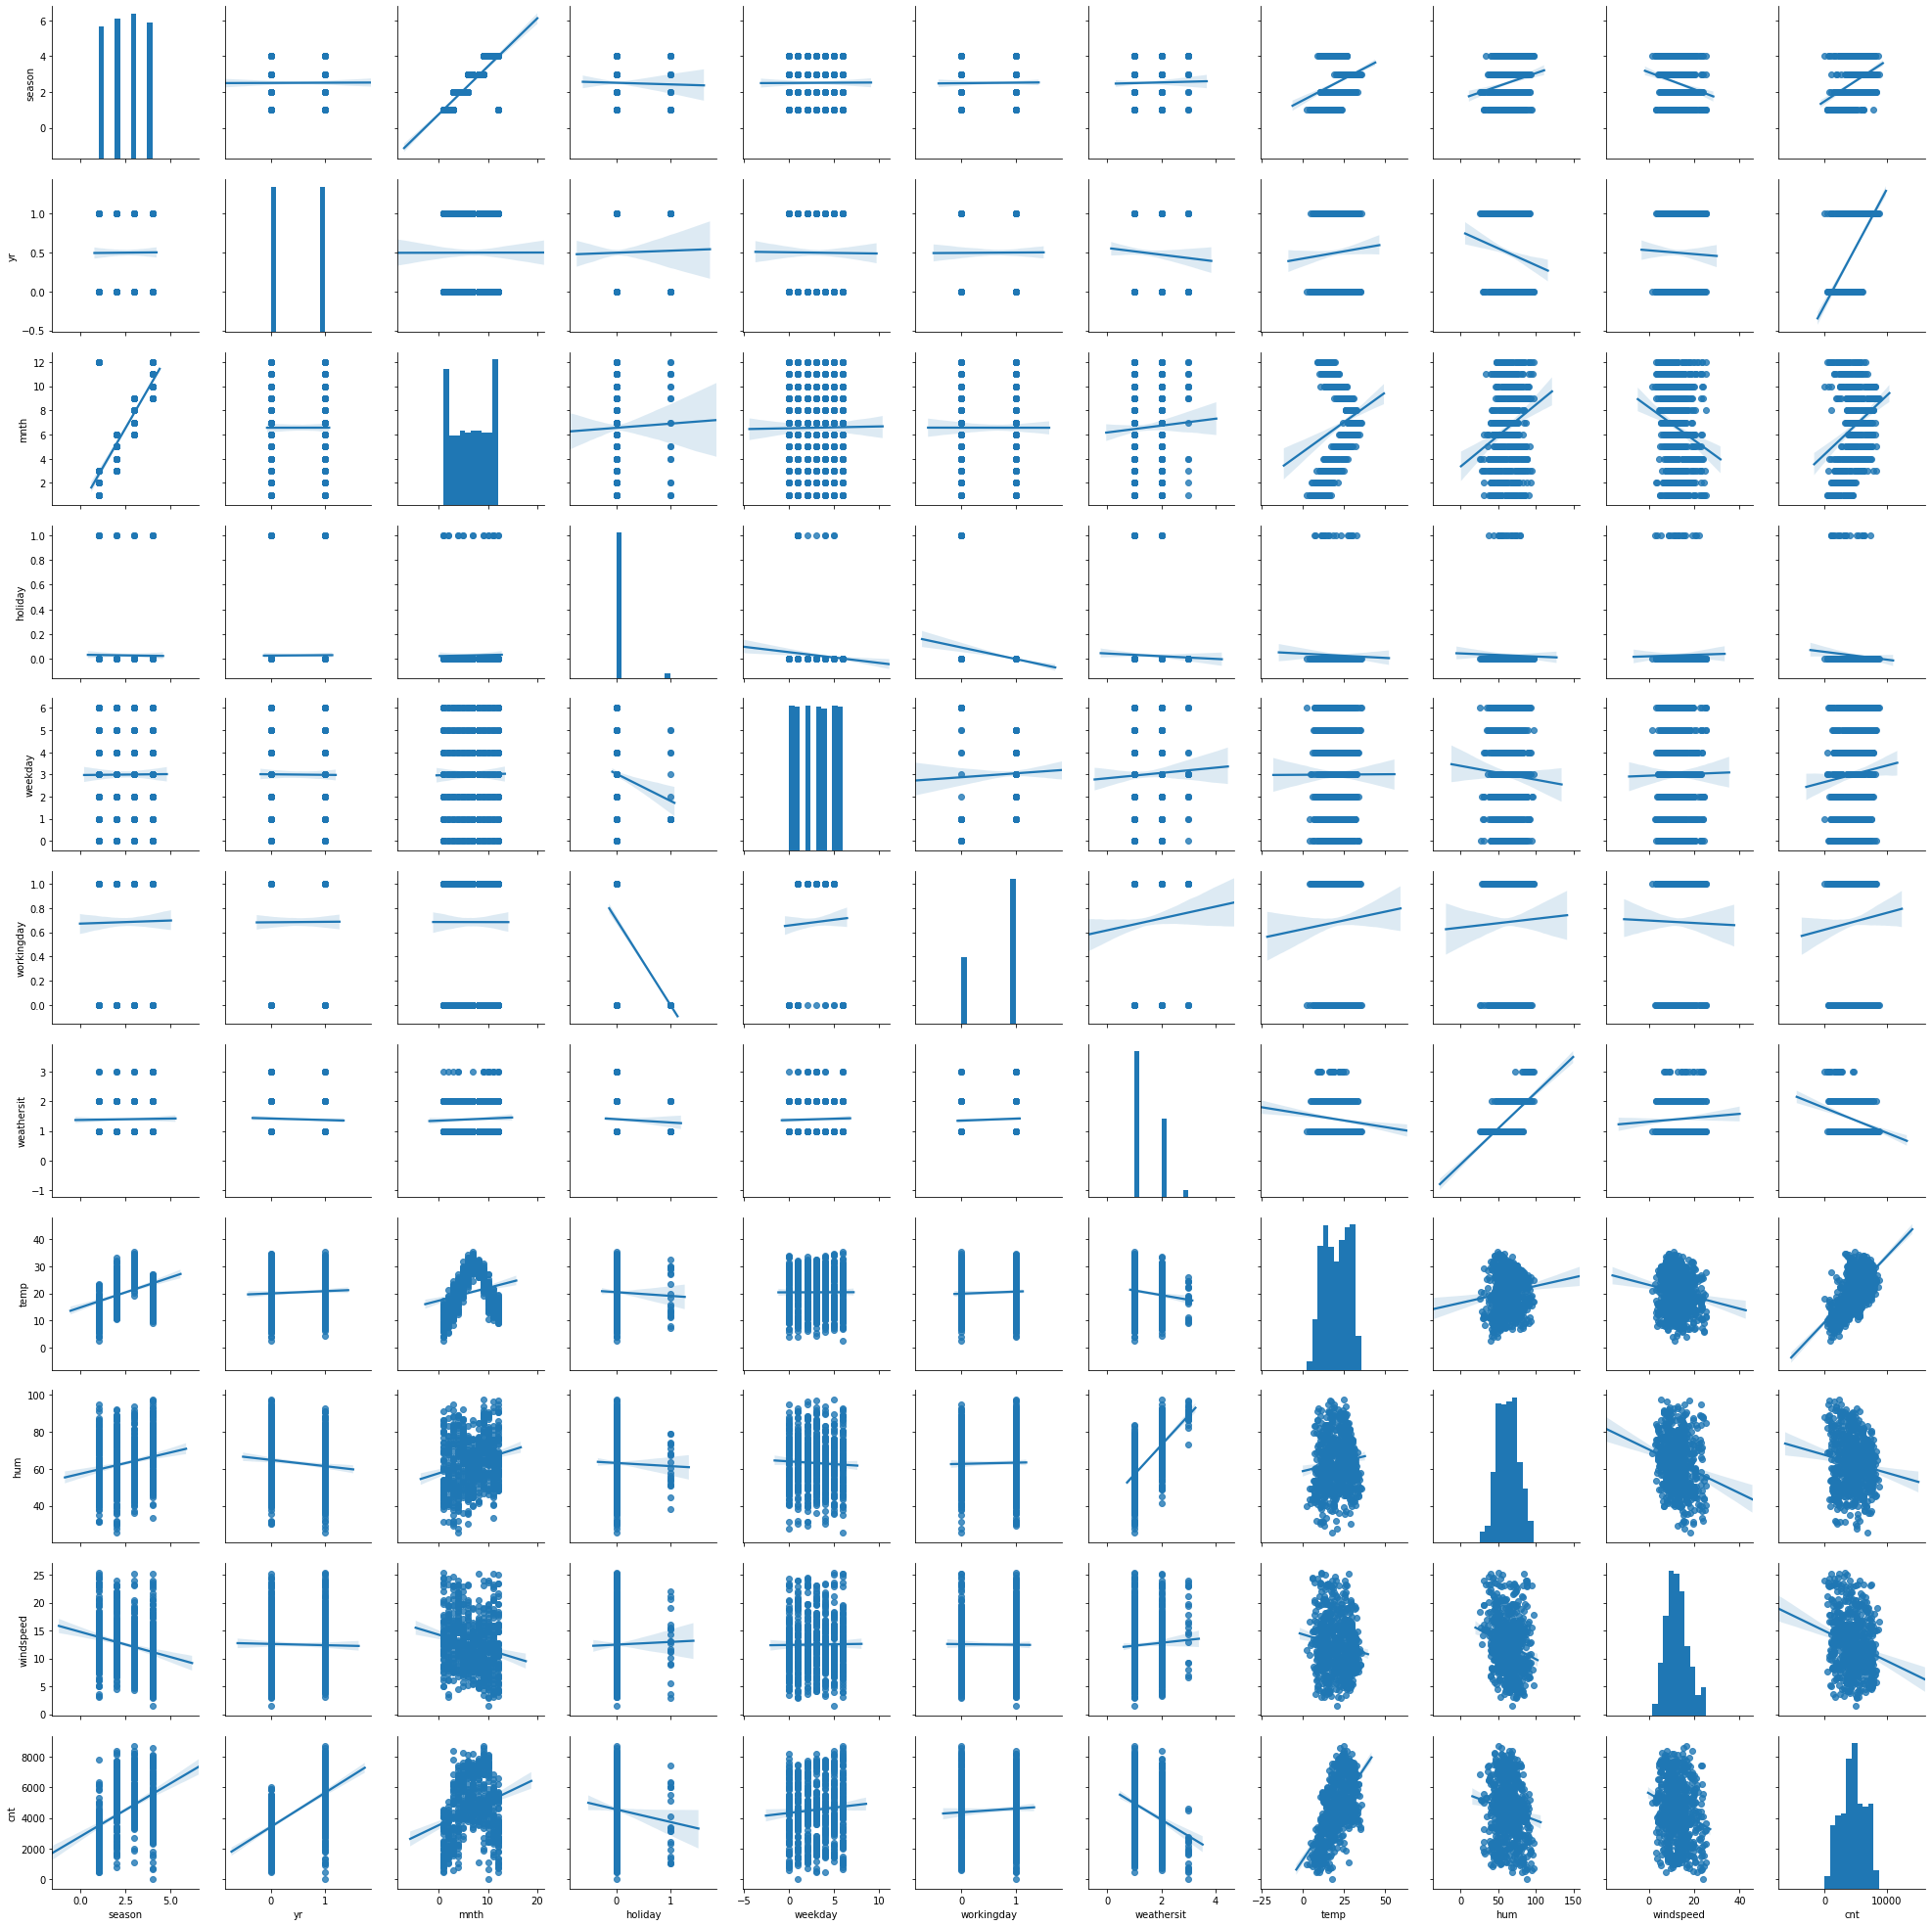

In [26]:
#Visualize the Numerical variables
sns.pairplot(rental_df,kind='reg')
plt.show()

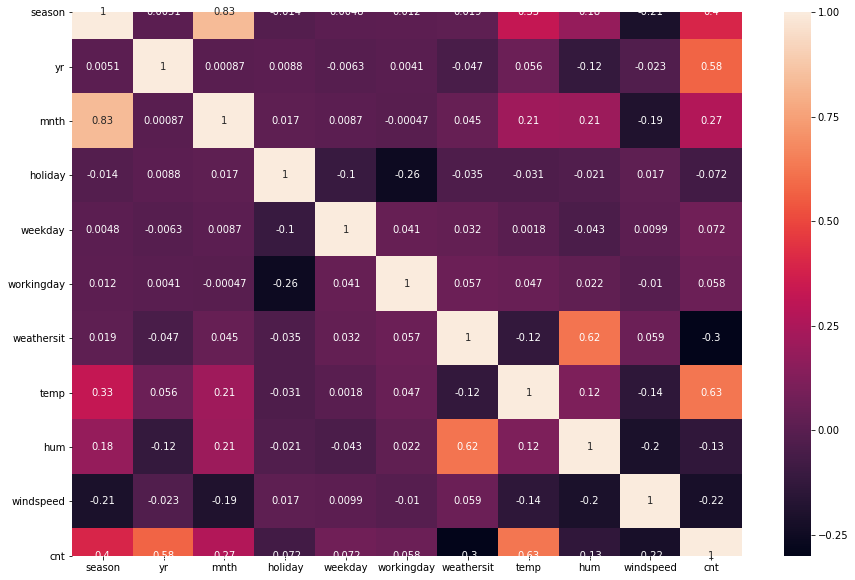

In [27]:
#heatmap - to find the correlation
plt.figure(figsize=(15,10))
sns.heatmap(rental_df.corr(),annot=True)
plt.show()

### Encoding
- Categorical vars to dummy vars

In [28]:
#creating dummy variables for WeatherSituation column
#1:'clear',2:'Mist',3:'Light Shower',4:'Heavy Shower'
df_weatsit = pd.get_dummies(rental_df['weathersit'],drop_first = True)
df_weatsit = df_weatsit.rename (columns = {1:'clear',2:'Mist',3:'Light Shower',4:'Heavy Shower'})
#df_weatsit = df_weatsit.drop('Light Shower',axis=1)
df_weatsit.head()

,Mist,Light Shower
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


#### Considering the Holidays,workingday and 2018 holiday calender
- 0-Sunday and 6-Saturday

In [29]:
df_weekday = pd.get_dummies(rental_df['weekday'],drop_first = True)
df_weekday = df_weekday.rename (columns = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
df_weekday.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [30]:
df_mnth = pd.get_dummies(rental_df['mnth'],drop_first = True)
df_mnth = df_mnth.rename (columns = { 1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df_mnth.head()

,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [31]:
df_season = pd.get_dummies(rental_df['season'],drop_first = True)
df_season = df_season.rename (columns = {4:'Winter',1:'Spring',2:'Summer',3:'fall'})
df_season.head()

,Summer,fall,Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [32]:
rental_df = pd.concat([rental_df,df_weatsit,df_season,df_weekday,df_mnth],axis=1)

In [33]:
rental_df = rental_df.drop(['weathersit','season','weekday','mnth'],axis=1)

In [34]:
rental_df.shape

(716, 29)

In [35]:
rental_df.corrwith(rental_df['cnt']).sort_values()

Feb            -0.262531
Light Shower   -0.234780
windspeed      -0.216685
Mist           -0.180554
Dec            -0.174748
hum            -0.134521
Mar            -0.133440
holiday        -0.072164
Nov            -0.045332
Monday         -0.036872
Tuesday         0.000088
Apr             0.002811
Wednesday       0.010561
Saturday        0.018535
Friday          0.032874
Thursday        0.035320
workingday      0.057753
Winter          0.057982
Oct             0.108336
May             0.129665
Summer          0.144781
Jul             0.163773
Aug             0.179837
Sep             0.192634
Jun             0.193551
fall            0.342310
yr              0.576941
temp            0.625421
cnt             1.000000
dtype: float64

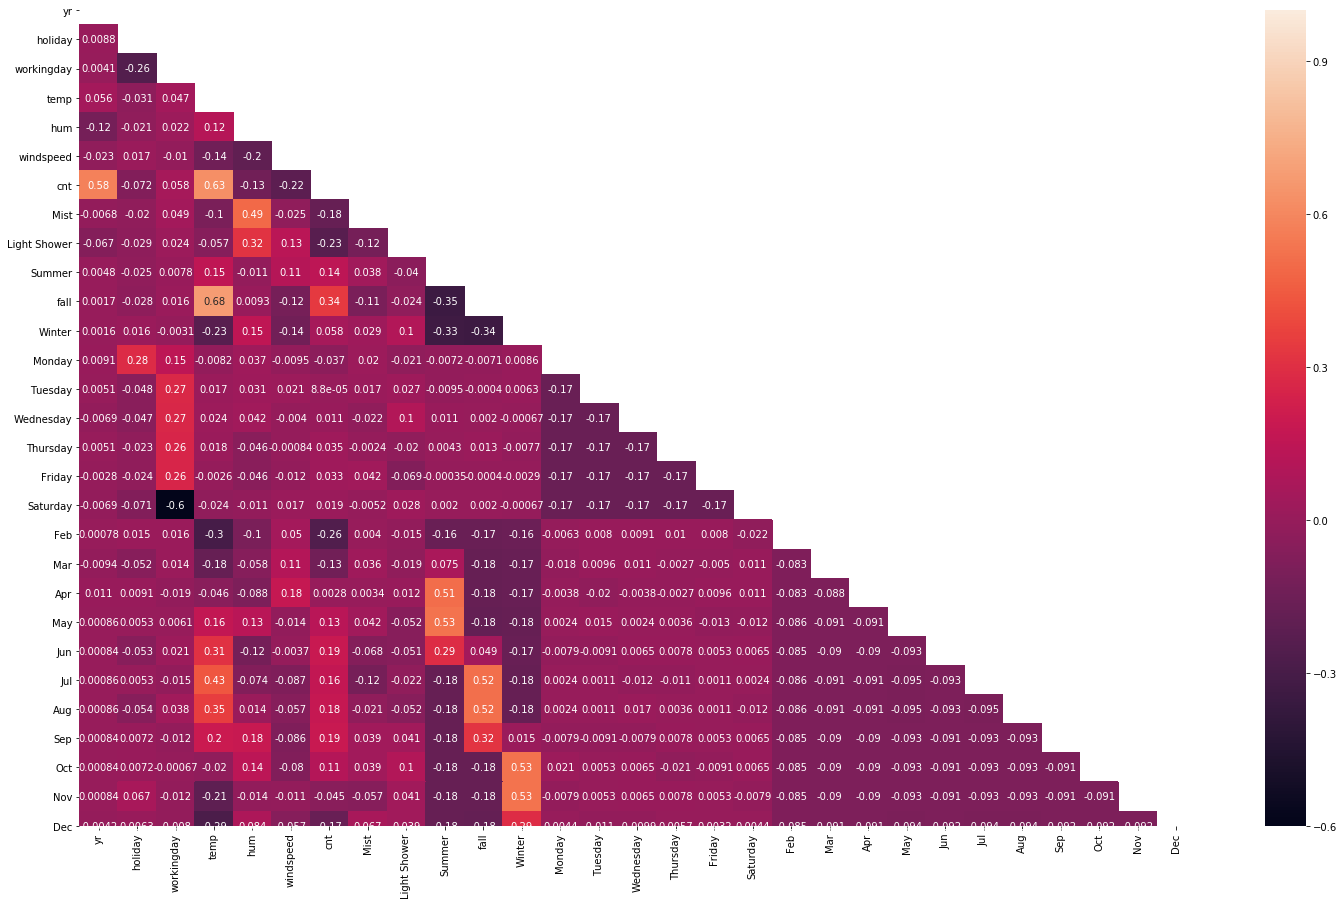

In [36]:
plt.figure(figsize=(25,15))
matrix = np.triu(rental_df.corr())
sns.heatmap(rental_df.corr(), annot=True, mask=matrix)
plt.show()

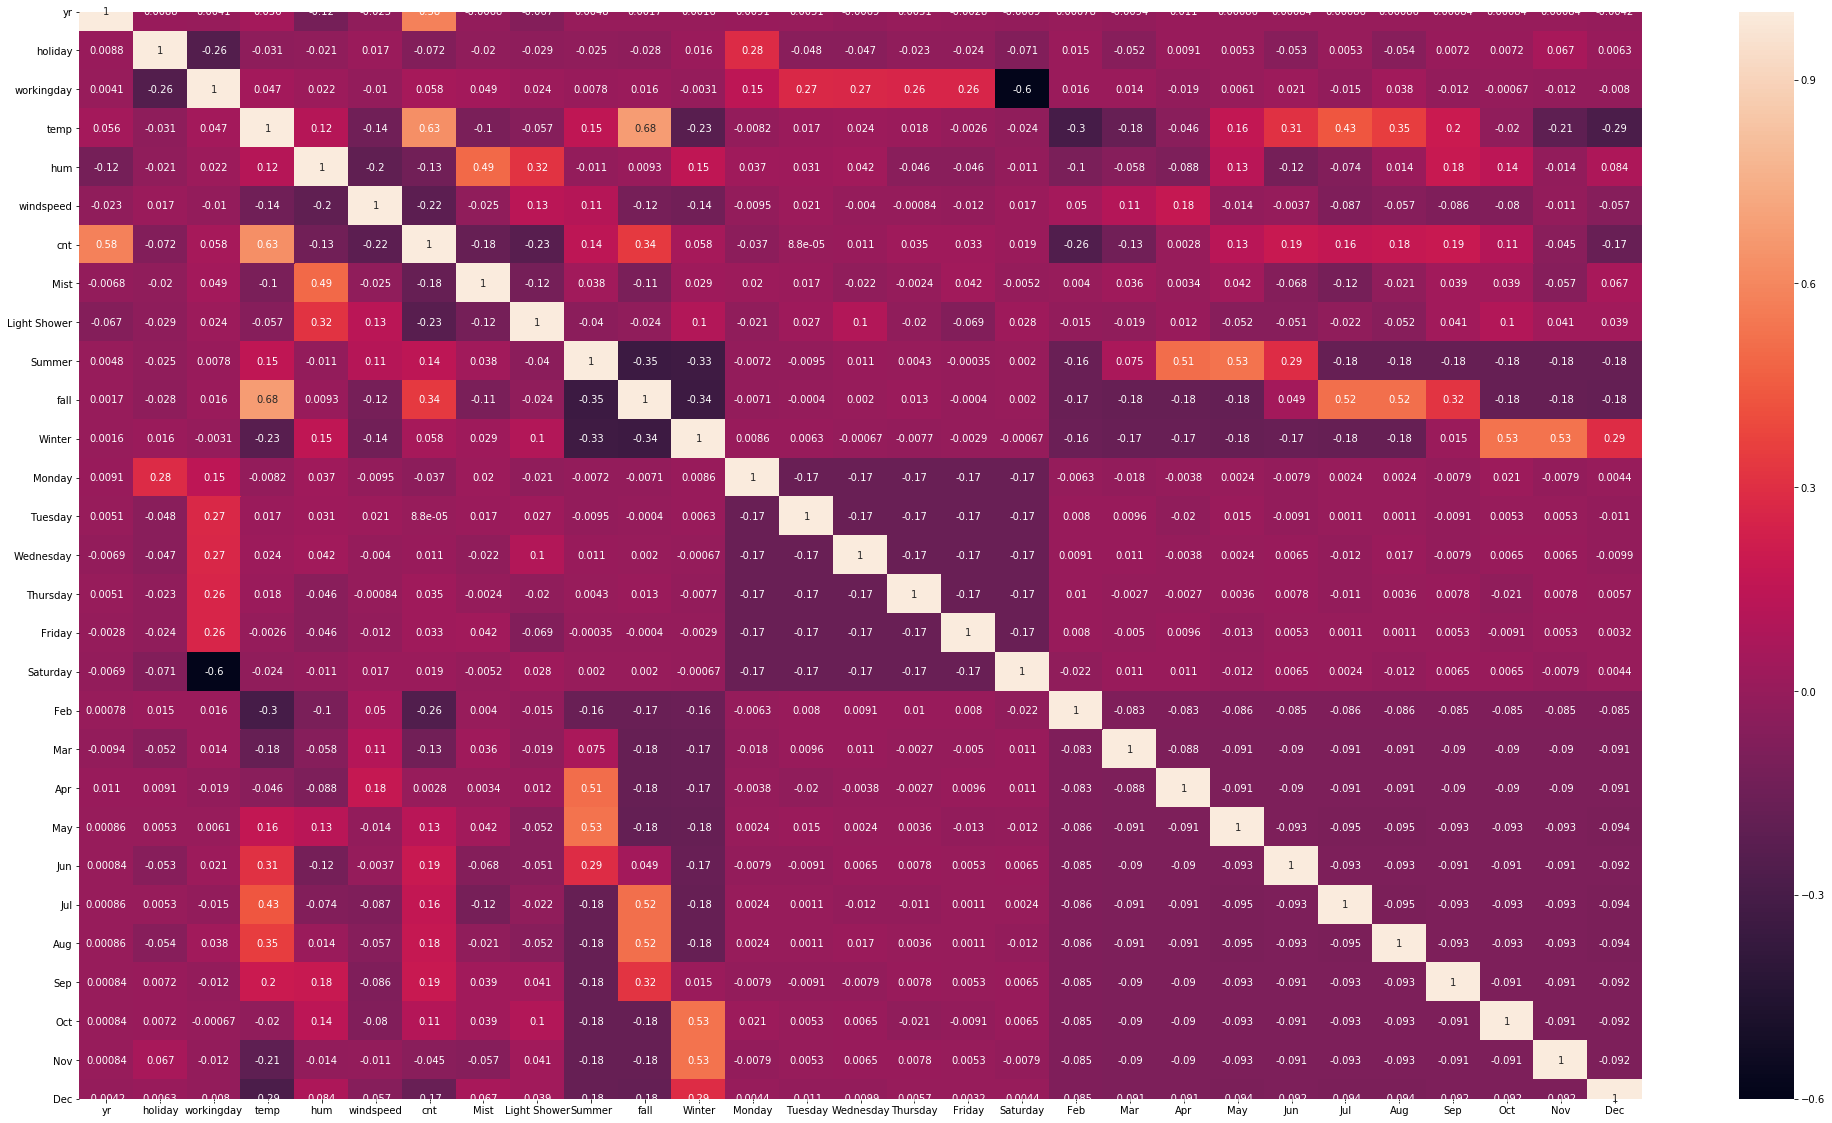

In [37]:
#heatmap - to find the correlation
plt.figure(figsize=(35,20))
sns.heatmap(rental_df.corr(),annot=True)
plt.show()

### Create the test and train data
 - Train : Test - 70:30

In [38]:
#create train and test data
df_train,df_test = train_test_split(rental_df,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(501, 29)
(215, 29)


### Scaling the data 
- MinMaxScaler - More appropriate as most of the data is in binary 0&1.

In [39]:
#Scale the data to mak einterpretation more meaningful
#scaler = MinMaxScaler()
scaler = StandardScaler()

columns_toscale = ['temp','hum','windspeed','cnt']
df_train[columns_toscale] = scaler.fit_transform(df_train[columns_toscale])

In [40]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Mist,Light Shower,Summer,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,501.000000,501.000000,501.000000,5.010000e+02,5.010000e+02,5.010000e+02,5.010000e+02,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.00000,501.000000,501.000000,501.000000,501.000000,501.000000,501.00000,501.00000
mean,0.504990,0.031936,0.682635,-1.646498e-16,-1.484729e-17,-3.654207e-16,2.211582e-16,0.365269,0.023952,0.241517,...,0.085828,0.075848,0.08982,0.069860,0.087824,0.087824,0.087824,0.077844,0.08982,0.08982
std,0.500475,0.176006,0.465916,1.001000e+00,1.001000e+00,1.001000e+00,1.001000e+00,0.481987,0.153053,0.428431,...,0.280390,0.265020,0.28621,0.255166,0.283322,0.283322,0.283322,0.268194,0.28621,0.28621
min,0.000000,0.000000,0.000000,-2.358562e+00,-2.471591e+00,-2.235542e+00,-2.298697e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.000000,0.000000,0.000000,-9.016234e-01,-7.419561e-01,-7.042555e-01,-7.111350e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,1.000000,0.000000,1.000000,1.054035e-02,7.052013e-03,-1.457956e-01,1.265889e-02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,1.000000,0.000000,1.000000,8.954753e-01,7.380117e-01,5.987043e-01,7.659747e-01,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
max,1.000000,1.000000,1.000000,1.884784e+00,2.290173e+00,2.603759e+00,2.125506e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


### Dividing into X and Y sets for the model building¶

In [41]:
y_train = df_train.pop('cnt')
X_train = df_train
y_train.head()

728   -1.395736
541    1.478062
116   -0.339058
718   -0.208755
496    1.471445
Name: cnt, dtype: float64

In [42]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Mist,Light Shower,Summer,fall,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
728,1,0,0,-1.287368,-1.075851,2.231625,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
541,1,0,1,0.754790,-1.869980,2.189288,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
116,0,0,1,0.695796,1.465968,1.707121,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
718,1,0,1,-0.883473,0.256726,-0.738090,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
496,1,0,0,0.391743,-1.096903,-0.865019,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


### Building our model
- This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
- Recursive feature elimination

In [43]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', False, 2),
 ('Mist', True, 1),
 ('Light Shower', True, 1),
 ('Summer', True, 1),
 ('fall', True, 1),
 ('Winter', True, 1),
 ('Monday', False, 6),
 ('Tuesday', False, 9),
 ('Wednesday', False, 5),
 ('Thursday', False, 7),
 ('Friday', False, 3),
 ('Saturday', True, 1),
 ('Feb', True, 1),
 ('Mar', True, 1),
 ('Apr', True, 1),
 ('May', True, 1),
 ('Jun', True, 1),
 ('Jul', True, 1),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 4),
 ('Dec', False, 8)]

In [45]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'Mist', 'Light Shower',
       'Summer', 'fall', 'Winter', 'Saturday', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['windspeed', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Nov', 'Dec'],
      dtype='object')

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col_rfe]

### Building model using statsmodel, the detailed statistics for the selected rfe features

### Assumptions in predicting the model
    1. Assumptions of linear regression
    2. VIF >5 is  with predictors are inspected and VIF> 10 are ignored
    3. p-value within 0.05
    4.  Durbin-Watson within -2 to +2 - check for Auto-Correlation
    5. Difference between R2-Squared of train to test prediction should be less than 5%

In [48]:
# Checking for the p-value and vif to dive into more understanding of features

#Build the model with satistics
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     134.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          4.89e-182
Time:                        22:09:12   Log-Likelihood:                -238.36
No. Observations:                 501   AIC:                             518.7
Df Residuals:                     480   BIC:                             607.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1806      0.095    -12.466   

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_vif = X_train_rfe
X_train_vif = X_train_vif.drop('const',axis=1)
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

        Features    VIF
8           fall  12.37
7         Summer   8.78
16           Jul   5.95
17           Aug   5.75
14           May   4.87
2     workingday   4.59
3           temp   4.03
15           Jun   4.00
13           Apr   3.95
18           Sep   3.89
5           Mist   2.55
9         Winter   2.54
4            hum   2.04
0             yr   2.00
10      Saturday   1.82
12           Mar   1.76
19           Oct   1.66
6   Light Shower   1.34
11           Feb   1.30
1        holiday   1.15


In [50]:
X_train_rfe = X_train_rfe.drop(["Jul"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_vif = X_train_rfe
X_train_vif = X_train_vif.drop('const',axis=1) 
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     140.9
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.24e-182
Time:                        22:09:12   Log-Likelihood:                -239.53
No. Observations:                 501   AIC:                             519.1
Df Residuals:                     481   BIC:                             603.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.1111      0.083    -13.440   

In [51]:
X_train_rfe = X_train_rfe.drop(["Jun"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_vif = X_train_rfe
X_train_vif = X_train_vif.drop('const',axis=1) 
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     148.5
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          1.98e-183
Time:                        22:09:12   Log-Likelihood:                -240.25
No. Observations:                 501   AIC:                             518.5
Df Residuals:                     482   BIC:                             598.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0854      0.080    -13.610   

In [52]:
X_train_rfe = X_train_rfe.drop(["Apr"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_vif = X_train_rfe
X_train_vif = X_train_vif.drop('const',axis=1) 
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     157.3
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.08e-184
Time:                        22:09:12   Log-Likelihood:                -240.56
No. Observations:                 501   AIC:                             517.1
Df Residuals:                     483   BIC:                             593.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0842      0.080    -13.603   

In [53]:
#hum is correlated with light Shower and mist. which leads to multicollinearity
X_train_rfe = X_train_rfe.drop(["Feb"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_vif = X_train_rfe
X_train_vif = X_train_vif.drop('const',axis=1) 
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     166.7
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          4.23e-185
Time:                        22:09:13   Log-Likelihood:                -241.58
No. Observations:                 501   AIC:                             517.2
Df Residuals:                     484   BIC:                             588.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0436      0.074    -14.033   

In [54]:
X_train_rfe = X_train_rfe.drop(["Aug"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_vif = X_train_rfe
X_train_vif = X_train_vif.drop('const',axis=1) 
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     177.2
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          9.40e-186
Time:                        22:09:13   Log-Likelihood:                -242.72
No. Observations:                 501   AIC:                             517.4
Df Residuals:                     485   BIC:                             584.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0444      0.074    -14.026   

In [55]:
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_vif = X_train_rfe
X_train_vif = X_train_vif.drop('const',axis=1) 
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     188.2
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          6.09e-186
Time:                        22:09:13   Log-Likelihood:                -245.01
No. Observations:                 501   AIC:                             520.0
Df Residuals:                     486   BIC:                             583.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0922      0.071    -15.345   

In [56]:
## Sep is highly correlated to Fall
X_train_rfe = X_train_rfe.drop(["Sep"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_vif = X_train_rfe
X_train_vif = X_train_vif.drop('const',axis=1) 
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          4.85e-179
Time:                        22:09:13   Log-Likelihood:                -264.20
No. Observations:                 501   AIC:                             556.4
Df Residuals:                     487   BIC:                             615.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0890      0.074    -14.742   

In [57]:
## Oct is highly correlated to Fall
X_train_rfe = X_train_rfe.drop(["May"], axis = 1)

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X_train_vif = X_train_rfe
X_train_vif = X_train_vif.drop('const',axis=1) 
vif['Features'] = X_train_vif.columns
vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     199.4
Date:                Mon, 02 Nov 2020   Prob (F-statistic):          2.06e-179
Time:                        22:09:13   Log-Likelihood:                -266.07
No. Observations:                 501   AIC:                             558.1
Df Residuals:                     488   BIC:                             613.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.0578      0.072    -14.643   

#### Feature considered for insignificance order
- high p-value and low VIF
- high p-value and high VIF
- low p-value and high VIF(more inspection)
- low p-value and low VIF

#### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [58]:
y_train_pred = lm.predict(X_train_rfe)
residual = y_train - y_train_pred

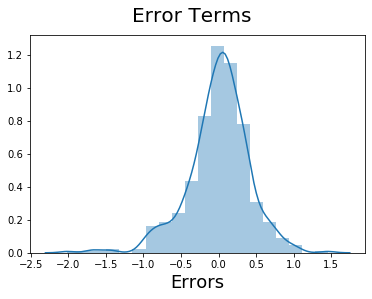

In [59]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)   # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.show()

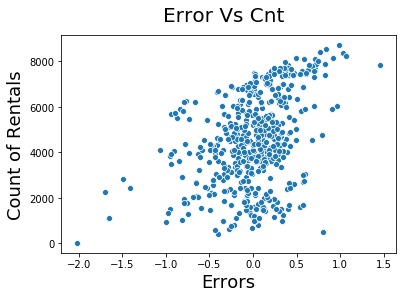

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.scatterplot(x = residual,y = 'cnt',data = rental_df,x_bins = 20)
fig.suptitle('Error Vs Cnt', fontsize = 20)  # Plot heading
plt.xlabel('Errors', fontsize = 18)
plt.ylabel('Count of Rentals', fontsize = 18)
plt.show()

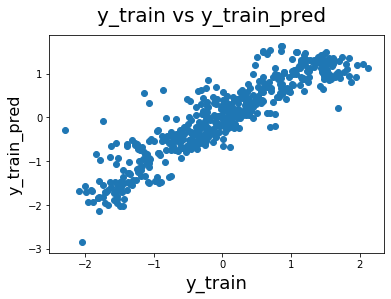

In [61]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label
plt.show()

In [62]:
r2_train = r2_score(y_true = y_train,y_pred=y_train_pred)

In [63]:
mean_squared_error(y_train, y_train_pred)

0.1693623795041313

### Making Predictions
- Applying the scaling on the test sets

In [64]:
# Scaling the test data same as train data
#transform the data
df_test[columns_toscale] = scaler.transform(df_test[columns_toscale])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Mist,Light Shower,Summer,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
583,1,0,1,1.326594,0.515417,-0.949706,1.392041,1,0,0,...,0,0,0,0,0,1,0,0,0,0
493,1,0,1,0.450737,0.807202,0.403985,0.091044,1,0,1,...,0,0,1,0,0,0,0,0,0,0
294,0,0,0,-0.379740,-0.023024,-1.279494,-0.117135,0,0,0,...,0,0,0,0,0,0,0,1,0,0
157,0,0,1,1.172299,-0.248629,0.014845,0.150088,0,0,1,...,0,0,0,1,0,0,0,0,0,0
670,1,0,1,-0.747329,-0.796101,1.080980,0.666211,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Mist,Light Shower,Summer,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,...,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.483721,0.023256,0.688372,0.096971,-0.024904,-0.019041,-0.002571,0.279070,0.037209,0.279070,...,0.069767,0.093023,0.079070,0.116279,0.083721,0.083721,0.074419,0.097674,0.069767,0.074419
std,0.500901,0.151067,0.464240,0.997172,1.015429,0.921755,0.943786,0.449589,0.189716,0.449589,...,0.255349,0.291143,0.270477,0.321307,0.277615,0.277615,0.263063,0.297567,0.255349,0.263063
min,0.000000,0.000000,0.000000,-2.154938,-2.730282,-1.964644,-2.085427,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-0.749597,-0.827686,-0.742151,-0.641148,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.210214,-0.074166,-0.069611,0.024366,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.913626,0.701915,0.556333,0.673337,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,2.011855,2.455619,2.189166,1.911727,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
X_test_cols_rfe = X_train_rfe.drop('const',axis=1).columns

#### Dividing into X_test and y_test

In [67]:
y_test = df_test.pop('cnt')
X_test = df_test

In [68]:
# Adding a constant variable 
X_test_sm = sm.add_constant(X_test[X_test_cols_rfe])
# Making predictions
y_pred  = lm.predict(X_test_sm)

In [69]:
res_test = y_test -y_pred 

### Model Evaluation

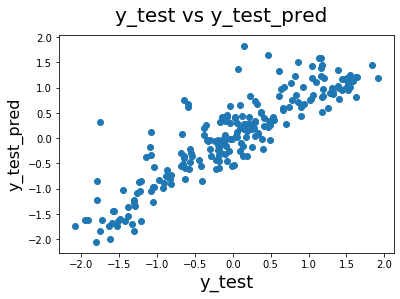

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred )
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label
plt.show()

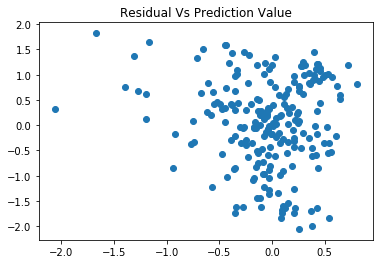

In [71]:
plt.scatter(res_test ,y_pred )
plt.title('Residual Vs Prediction Value')
plt.show()

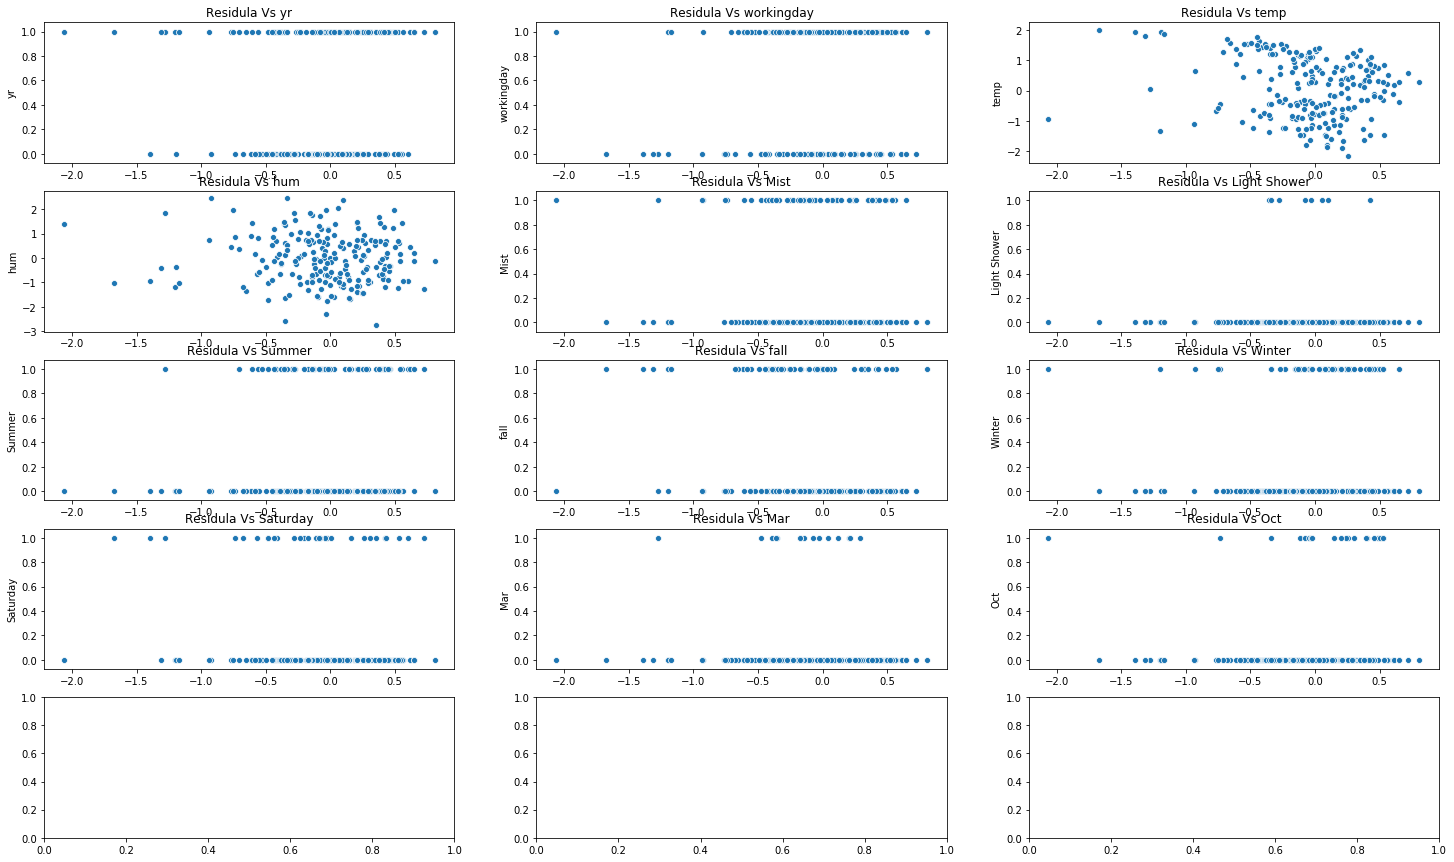

In [72]:
fig, axs = plt.subplots(5, 3, figsize=(25,15))
j=0
for i in X_test_cols_rfe:
    plt.subplot(5,3,j+1)
    sns.scatterplot(res_test,X_test[i])
    plt.title('Residula Vs '+ i)
    j=j+1
plt.show()

In [73]:
r2_test = r2_score(y_true = y_test,y_pred=y_pred )

In [74]:
r2_score(y_true = y_test,y_pred=y_pred )

0.7862629752536087

In [75]:
mean_squared_error(y_test, y_pred )

0.18949701050781254

In [76]:
print(r2_train)
print(r2_test)
r2_train - r2_test

0.8306376204958688
0.7862629752536087


0.04437464524226009

### Summary:
- Model Selected :  RFE Approach
- Scaling - Standardise Scaling
- R-Squared - 0.8306
- Adjusted R-Squared - 0.826
- R2_Score(predicted model)- 0.7862

In [77]:
df_pred = pd.read_html(lm.summary2().as_html())[1]
df_pred =df_pred[1:]
df_pred['Predictor'] =df_pred[0]
df_pred['Coefficient'] =df_pred[1]

In [78]:
df_pred =df_pred[['Predictor','Coefficient']]
df_pred

,Predictor,Coefficient
1,const,-1.0578
2,yr,1.0358
3,workingday,0.1974
4,temp,0.4994
5,hum,-0.0519
6,Mist,-0.2508
7,Light Shower,-1.1576
8,Summer,0.5408
9,fall,0.4821
10,Winter,0.7547


In [79]:
df_pred['Coefficient'] = df_pred['Coefficient'].astype(np.float)

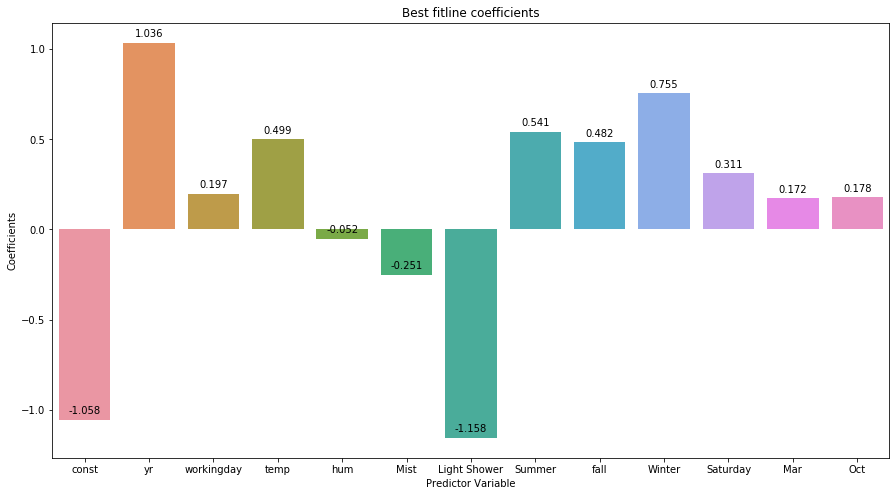

In [80]:
plt.figure(figsize=(15,8))
splot = sns.barplot(x = 'Predictor',y='Coefficient',data = df_pred)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Best fitline coefficients')
plt.xlabel('Predictor Variable')
plt.ylabel('Coefficients')
plt.show()

### The equation for the best fitted line for target varaiable 'cnt' is
    cnt =  -1.0578 +  (1.0358 * yr)  + (0.1974 * workingday) +( 0.4994 * temp) - (0.0519 * hum) - (0.2508 * Mist) - (1.1576 * Light Shower) +
                (0.5048 * Summer) + (0.7547 * Winter) + ( 0.3106 * Saturday) + (0.1776 * Oct)+(0.4821 * fall)+ (0.1716 * Mar)